### Script for reading data for Problem 4.2 (data_MoleculeTypes.txt) in Applied Statistics 2022 problem set:

This script reads the file __"data_MoleculeTypes.txt"__ for Problem 4.2 in the problem set of Applied Statistics 2022/23. This data files contains 986 entries in two columns: 

* **size** ($\mathrm{\mu m}$) of particles,
* **intensity** of particles.


####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 1st of December 2022

In [589]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp
sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [590]:
dataframe = pd.read_csv('data_MoleculeTypes.csv', header=0, index_col=None)
size, intensity = dataframe.values.T
dataframe

,45.267,0.800
0,43.549,0.736
1,41.326,0.390
2,26.767,0.281
3,24.066,0.220
4,48.232,0.766
...,...,...
980,44.660,0.576
981,41.076,0.744
982,42.454,0.657
983,53.994,0.698


Print the first 10 entries to check the content of the file:

In [591]:
for i in range(10):
    print(f"  size = {size[i]:4.3f} microm    intensity = {intensity[i]:5.3f}")

  size = 43.549 microm    intensity = 0.736
  size = 41.326 microm    intensity = 0.390
  size = 26.767 microm    intensity = 0.281
  size = 24.066 microm    intensity = 0.220
  size = 48.232 microm    intensity = 0.766
  size = 27.078 microm    intensity = 0.655
  size = 46.099 microm    intensity = 0.577
  size = 45.537 microm    intensity = 0.543
  size = 44.078 microm    intensity = 0.659
  size = 45.365 microm    intensity = 0.718


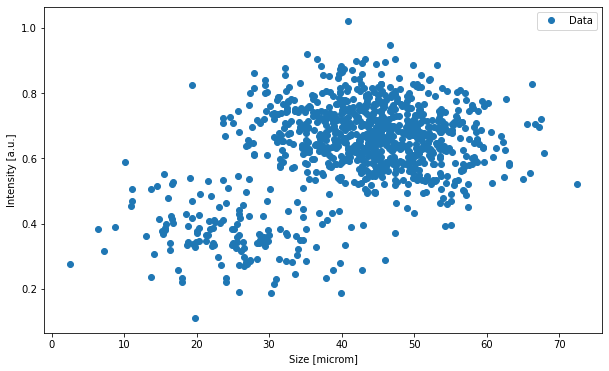

In [592]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(size, intensity, 'o', label='Data')
plt.xlabel('Size [microm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.show()


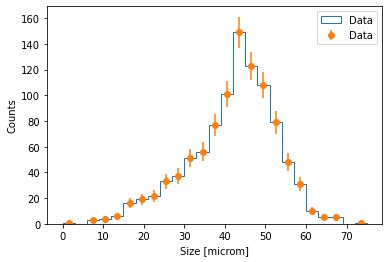

In [593]:
Nbins = 25
xmin, xmax = 0, 75
binwidth = (xmax - xmin) / Nbins

count,bins,_ = plt.hist(size, bins=Nbins, range=(xmin, xmax), histtype='step', label='Data')
mask = count > 0
count = count[mask]
error_count = np.sqrt(count)
center_bins = (bins[:-1] + bins[1:]) / 2
center_bins = center_bins[mask]

plt.errorbar(center_bins, count, yerr=error_count, fmt='o', label='Data')
plt.xlabel('Size [microm]')
plt.ylabel('Counts')
plt.legend()

In [594]:
def gaussian(x, mu, sigma, N):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)


def minuit_chi2_fit(x, model, initvalues,bin_centers=center_bins,counts = count,c_errors=error_count):

    # Define the chi2 function
    chi2_object = Chi2Regression(model, bin_centers, counts, c_errors)
    chi2_object.errordef = 1
    minuit = Minuit(chi2_object, **initvalues)
    minuit.migrad();
    return minuit

In [595]:
minuit_chi2_fit(size, gaussian, {'mu': 50, 'sigma': 5, 'N': 1000})

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 78.47                      │              Nfcn = 85               │
│ EDM = 0.000151 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   42.7    │    0.4    │            │            │         │         │       │
│ 1 │ sigma │    9.8    │    0.4    │            │            │         │         │       │
│ 2 │ N     │    909    │    30     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │      mu   sigma       N │
├───────┼─────────────────────────┤
│    mu │   0.176 -0.0952 -0.0749 │
│ sigma │ -0.0952   0.133   0.199 │
│     N │ -0.0749   0.199     912 │
└───────┴─────────────────────────┘

In [596]:
gaus_fit = minuit_chi2_fit(size, gaussian, {'mu': 50, 'sigma': 5, 'N': 1000})
print(gaus_fit.values)

<ValueView mu=42.69408030875139 sigma=9.777608884980076 N=909.200582259615>


827
25
25


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.55                      │              Nfcn = 86               │
│ EDM = 3.63e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   44.59   │   0.29    │            │            │         │         │       │
│ 1 │ sigma │   8.08    │   0.25    │            │            │         │         │       │
│ 2 │ N     │    802    │    28     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │      mu   sigma       N │
├───────┼─────────────────────────┤
│    mu │  0.0849 -0.0123  0.0121 │
│ sigma │ -0.0123  0.0605  0.0525 │
│     N │  0.0121  0.0525     803 │
└───────┴─────────────────────────┘

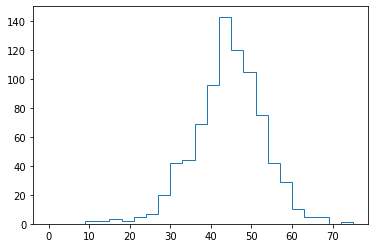

In [597]:
mask = intensity>0.5

print(np.sum(mask))
size1 = size[mask]

count1,bins1,_ = plt.hist(size1, bins=Nbins, range=(xmin, xmax), histtype='step', label='Data')

print(len(count1))


#remove bins with no counts
mask1 = count1>0
print(len(mask1))

count1 = count1[mask1]
error_count1 = np.sqrt(count1)
center_bins1 = (bins1[:-1] + bins1[1:]) / 2

center_bins1 = center_bins1[mask1]

chi2_object = Chi2Regression(gaussian, center_bins1, count1, error_count1)
chi2_object.errordef = 1
gaus_fit1 = Minuit(chi2_object, mu=50, sigma=5, N=1000)
gaus_fit1.migrad()

# gaus_fit1 = minuit_chi2_fit(size1, gaussian, {'mu': 50, 'sigma': 5, 'N': 1000},bin_centers=center_bins1,counts = count1,c_errors=error_count1)
# gaus_fit

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


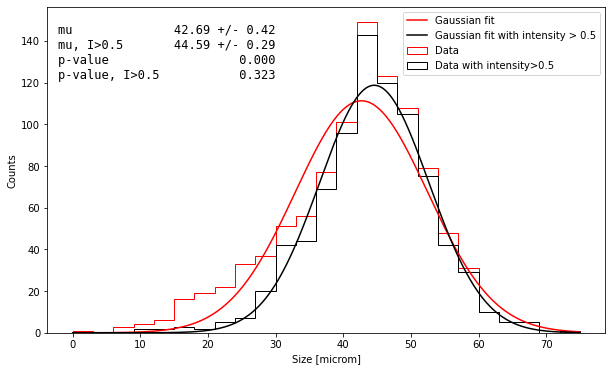

In [598]:
# p-values of the gaussian fits
p1=stats.chi2.sf(gaus_fit.fval, Nbins-2)
p2=stats.chi2.sf(gaus_fit1.fval, Nbins-2)
# print(f"p-value of the gaussian fit to the data: {p1}")
# print(f"p-value of the gaussian fit to the data with intensity > 0.5: {p2}")

#plot the intensity gaussian fits
intens = np.linspace(0,75,10000)
plt.figure(figsize=(10, 6))
plt.plot(intens, gaussian(intens, *gaus_fit.values), label='Gaussian fit', color='r')
plt.plot(intens, gaussian(intens, *gaus_fit1.values), label='Gaussian fit with intensity > 0.5', color='k')

plt.hist(size, bins=Nbins, range=(xmin, xmax), histtype='step', label='Data', color='r')
plt.hist(size1, bins=Nbins, range=(xmin, xmax), histtype='step', label='Data with intensity>0.5', color='k')

plt.xlabel('Size [microm]')
plt.ylabel('Counts')
d = {'mu':[gaus_fit.values['mu'], gaus_fit.errors['mu']],
     'mu, I>0.5':[gaus_fit1.values['mu'], gaus_fit1.errors['mu']],
     'p-value':f"{p1:.3f}",
      'p-value, I>0.5':f"{p2:.3f}"}
text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.02, 0.95, text, ax=plt.gca(), fontsize=12)
plt.legend()
plt.savefig('initguas_moleculetypes.eps',bbox_inches='tight')

28.967896789678967
5.047260122205177
# particles up to 90% cutoff: 126


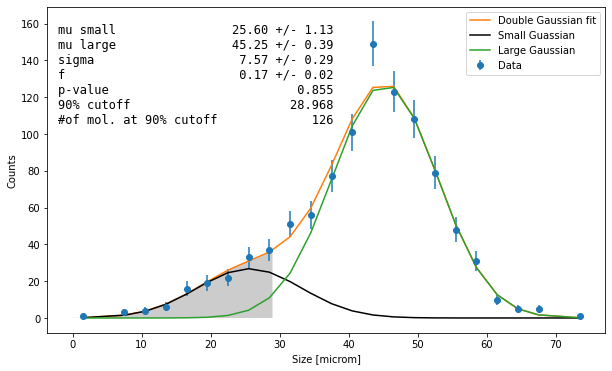

In [599]:
# fit 2 gaussians to the data
def double_gaussian(x, sigma, f, N , mu1, mu2):
    return N * binwidth * (f * stats.norm.pdf(x, mu1, sigma) + (1 - f) * stats.norm.pdf(x, mu2, sigma))

chi2 = Chi2Regression(double_gaussian, center_bins, count, error_count)
minuit = Minuit(chi2, sigma=5, f=0.0, N=1000, mu1=25, mu2=45)
minuit.migrad()

pd = stats.chi2.sf(minuit.fval, Nbins-5)


fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(center_bins, count, yerr=error_count, fmt='o', label='Data')
ax.plot(center_bins, double_gaussian(center_bins, *minuit.values), label='Double Gaussian fit')


def gauss_f(x, mu, sigma,f,N):
    return N * binwidth * (f * stats.norm.pdf(x, mu, sigma))


ax.plot(center_bins, gauss_f(center_bins, minuit.values['mu1'], minuit.values['sigma'],minuit.values['f'],minuit.values['N']), label='Small Guassian',c='k')
ax.plot(center_bins, gauss_f(center_bins, minuit.values['mu2'], minuit.values['sigma'],1-minuit.values['f'],minuit.values['N']), label='Large Gaussian')
ax.set_xlabel('Size [microm]')
ax.set_ylabel('Counts')





spacey= np.linspace(0,75,10000)
part_s=gauss_f(spacey, minuit.values['mu1'], minuit.values['sigma'],minuit.values['f'],minuit.values['N'])
part_l=gauss_f(spacey, minuit.values['mu2'], minuit.values['sigma'],1-minuit.values['f'],minuit.values['N'])
tot=double_gaussian(spacey, *minuit.values)



part_s_perc=np.cumsum(part_s)/np.cumsum(tot)
plot_perc=np.linspace(0,1,10000)
loc = np.where(part_s_perc>0.9)[-1][-1]
size_cutoff=spacey[loc]
print(spacey[loc])

#vertical line up to small gaussian
# lin = np.linspace(0,spacey[np.where(part_s_perc>0.9)[-1][-1]],1000)
ax.fill_between(spacey[:3861],tot[:3861],0,facecolor='k',alpha=0.2)


mask90_init = size < size_cutoff

mole = np.sum([mask90_init])

d = {'mu small':[minuit.values['mu1'], minuit.errors['mu1']],
     'mu large':[minuit.values['mu2'], minuit.errors['mu2']],
        'sigma':[minuit.values['sigma'], minuit.errors['sigma']],
        'f':[minuit.values['f'], minuit.errors['f']],
     'p-value':f"{pd:.3f}", '90% cutoff':f"{spacey[np.where(part_s_perc>0.9)[-1][-1]]:.3f}"
     ,'#of mol. at 90% cutoff':f"{mole:d}"}

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.02, 0.95, text, ax=plt.gca(), fontsize=12)



print(np.sum(tot[:3861])/10000)
print(f'# particles up to 90% cutoff: {mole}')

ax.legend()
plt.savefig('init_doubleguas_moleculetypes.png',bbox_inches='tight',dpi=1000)

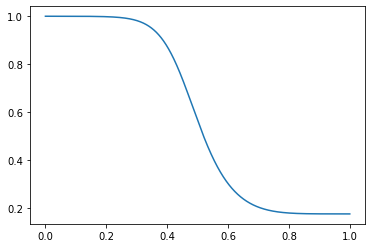

In [600]:

plt.plot(plot_perc,part_s_perc)


25
25


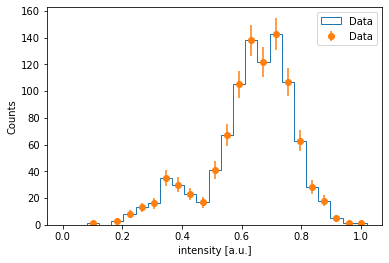

In [601]:
intmin, intmax = 0, np.max(intensity)
binwidth = (intmax - intmin) / Nbins

count_int,bins_int,_ = plt.hist(intensity, bins=Nbins, range=(intmin, intmax), histtype='step', label='Data')
mask_int = count_int > 0
print(len(mask_int))
print(len(count_int))


count_int = count_int[mask_int]
error_count_int = np.sqrt(count_int)
center_bins_int = (bins_int[:-1] + bins_int[1:]) / 2
center_bins_int = center_bins_int[mask_int]

plt.errorbar(center_bins_int, count_int, yerr=error_count_int, fmt='o', label='Data')
plt.xlabel('intensity [a.u.]')
plt.ylabel('Counts')
plt.legend()

<ValueView sigma=0.09245144586541515 f=0.1430214727516116 N=967.4795108684174 mu1=0.362906109998473 mu2=0.6747134740786622>


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.08                      │              Nfcn = 147              │
│ EDM = 4.89e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sigma │  0.0925   │  0.0026   │            │            │         │         │       │
│ 1 │ f     │   0.143   │   0.014   │            │            │         │         │       │
│ 2 │ N     │    967    │    31     │            │            │         │         │       │
│ 3 │ mu1   │   0.363   │   0.010   │            │            │         │         │       │
│ 4 │ mu2   │   0.675   │   0.004   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │     sigma         f         N       mu1       mu2 │
├───────┼───────────────────────────────────────────────────┤
│ sigma │  6.69e-06 -9.44e-06  0.000837  -5.9e-06 -1.78e-06 │
│     f │ -9.44e-06  0.000198  -0.00111  5.48e-05  1.53e-05 │
│     N │  0.000837  -0.00111       969  -0.00472 -0.000476 │
│   mu1 │  -5.9e-06  5.48e-05  -0.00472   0.00011  1.19e-05 │
│   mu2 │ -1.78e-06  1.53e-05 -0.000476  1.19e-05   1.4e-05 │
└───────┴───────────────────────────────────────────────────┘

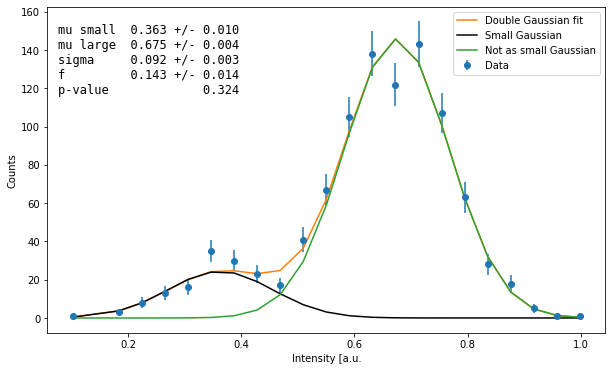

In [602]:
#Intensity bins

binwidth_int = (intmax - intmin) / Nbins
def double_gaussian_int(x, sigma, f, N , mu1, mu2):
    return N * binwidth_int * (f * stats.norm.pdf(x, mu1, sigma) + (1 - f) * stats.norm.pdf(x, mu2, sigma))

chi2_int = Chi2Regression(double_gaussian_int, center_bins_int, count_int, error_count_int)
intens_fit = Minuit(chi2_int, sigma=0.2, f=0.2, N=500, mu1=0.3, mu2=0.7)
intens_fit.migrad()
print(intens_fit.values)


fig_int, ax_int = plt.subplots(figsize=(10, 6))
ax_int.errorbar(center_bins_int, count_int, yerr=error_count_int, fmt='o', label='Data')
ax_int.plot(center_bins_int, double_gaussian(center_bins_int, *intens_fit.values), label='Double Gaussian fit')
def gauss_fint(x, mu, sigma,f,N):
    return N * binwidth_int * (f * stats.norm.pdf(x, mu, sigma))
ax_int.plot(center_bins_int, gauss_fint(center_bins_int, intens_fit.values['mu1'], intens_fit.values['sigma'],intens_fit.values['f'],intens_fit.values['N']), label='Small Gaussian',c='k')
ax_int.plot(center_bins_int, gauss_fint(center_bins_int, intens_fit.values['mu2'], intens_fit.values['sigma'],1-intens_fit.values['f'],intens_fit.values['N']), label='Not as small Gaussian')
ax_int.set_xlabel('Intensity [a.u.')
ax_int.set_ylabel('Counts')
ax_int.legend()

#chi2 test
chi2_int = intens_fit.fval
ndf_int = len(count_int) - len(intens_fit.values)
pd_int = stats.chi2.sf(chi2_int, ndf_int)


d = {'mu small':[intens_fit.values['mu1'], intens_fit.errors['mu1']],
     'mu large':[intens_fit.values['mu2'], intens_fit.errors['mu2']],
        'sigma':[intens_fit.values['sigma'], intens_fit.errors['sigma']],
        'f':[intens_fit.values['f'], intens_fit.errors['f']],
        'p-value':f"{pd_int:.3f}"}

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text, ax=plt.gca(), fontsize=12)


plt.savefig('init_doubleguas_intensity.eps',bbox_inches='tight')
intens_fit

In [603]:
# Making 2 data points for the mean of each of the double gaussian fits
means_size = [minuit.values['mu1'], minuit.values['mu2']]
means_int = [intens_fit.values['mu1'], intens_fit.values['mu2']]

inclination = (means_int[1] - means_int[0]) / (means_size[1] - means_size[0])
print(inclination)

print(np.arctan(inclination))
#Making a linear function
def linear(x, a, b):
    return a*x + b


# Making a linear fit through the two data points for the mean of the double gaussian fits
chi2_mean = Chi2Regression(linear, means_size, means_int)
mean_fit = Minuit(chi2_mean, a=0.015, b=0)
mean_fit.migrad()
print(mean_fit.values)
mean_fit


# chi2_int = Chi2Regression(linear, center_bins_int, count_int, error_count_int)
# intens_fit = Minuit(chi2_int, sigma=0.2, f=0.2, N=500, mu1=0.3, mu2=0.7)
# intens_fit.migrad()

0.015872501128608843
0.015871168377037358
<ValueView a=0.014861886655682137 b=-0.00649678685436745>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0001999                  │              Nfcn = 25               │
│ EDM = 0.0002 (Goal: 0.0002)      │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.01    │   0.07    │            │            │         │         │       │
│ 1 │ b    │   -0.0    │    2.7    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00518  -0.184 │
│ b │  -0.184       7 │
└───┴─────────────────┘

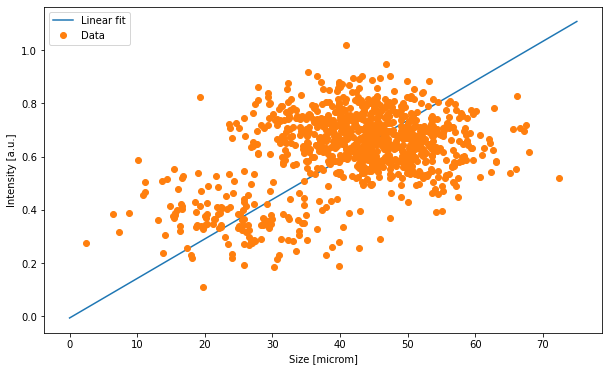

In [604]:

plt.figure(figsize=(10, 6))
plt.plot(spacey,linear(spacey, *mean_fit.values), label='Linear fit')
plt.plot(size, intensity, 'o', label='Data')
plt.xlabel('Size [microm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.show()

1.5559355342039756


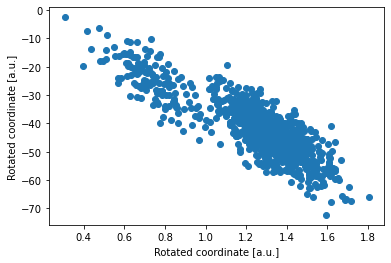

In [614]:
# Find angle of linear fit
angle = np.pi/2-np.arctan(mean_fit.values['a'])
print(angle)
rotate = np.array([[np.cos(-angle), -np.sin(-angle)], [np.sin(-angle), np.cos(-angle)]])

# Rotate the data
size_rot,intens_rot = np.dot(rotate, np.array([size, intensity + mean_fit.values['b']]))

plt.plot(size_rot, intens_rot, 'o')
plt.xlabel('Rotated coordinate [a.u.]')
plt.ylabel('Rotated coordinate [a.u.]')

plt.savefig('rotated_data.eps',bbox_inches='tight')


(array([  1.,   2.,   3.,   4.,   8.,  27.,  26.,  28.,  22.,  13.,   9.,
         10.,  22.,  41.,  77., 116., 139., 134., 128.,  86.,  48.,  27.,
          9.,   4.,   1.]),
 array([0.305431  , 0.36537722, 0.42532344, 0.48526967, 0.54521589,
        0.60516211, 0.66510833, 0.72505456, 0.78500078, 0.844947  ,
        0.90489323, 0.96483945, 1.02478567, 1.0847319 , 1.14467812,
        1.20462434, 1.26457056, 1.32451679, 1.38446301, 1.44440923,
        1.50435546, 1.56430168, 1.6242479 , 1.68419413, 1.74414035,
        1.80408657]),
 <a list of 25 Patch objects>)

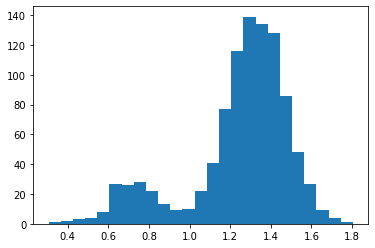

In [606]:
plt.hist(size_rot,bins=Nbins)

25
25


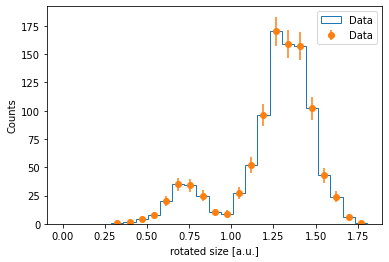

In [607]:
rotmin, rotmax = 0, np.max(size_rot)
binwidth = (rotmax - rotmin) / Nbins

count_rot,bins_rot,_ = plt.hist(size_rot, bins=Nbins, range=(rotmin, rotmax), histtype='step', label='Data')
mask_rot = count_rot > 0
print(len(mask_rot))
print(len(count_rot))


count_rot = count_rot[mask_rot]
error_count_rot = np.sqrt(count_rot)
center_bins_rot = (bins_rot[:-1] + bins_rot[1:]) / 2
center_bins_rot = center_bins_rot[mask_rot]

plt.errorbar(center_bins_rot, count_rot, yerr=error_count_rot, fmt='o', label='Data')
plt.xlabel('rotated size [a.u.]')
plt.ylabel('Counts')
plt.legend()

<ValueView sigma=0.1361299425546938 f=0.14325153726158174 N=970.7231301142147 mu1=0.7282625808789157 mu2=1.333333046964431>
1.049009900990099
0.08446370657101154


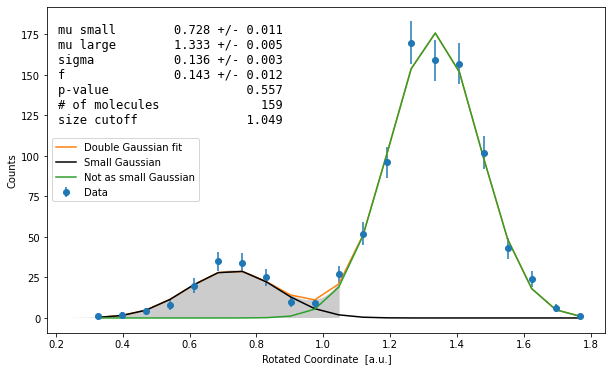

In [636]:
binwidth_rot = (rotmax - rotmin) / Nbins
def double_gaussian_rot(x, sigma, f, N , mu1, mu2):
    return N * binwidth_rot * (f * stats.norm.pdf(x, mu1, sigma) + (1 - f) * stats.norm.pdf(x, mu2, sigma))

chi2_rot = Chi2Regression(double_gaussian_rot, center_bins_rot, count_rot, error_count_rot)
rot_fit = Minuit(chi2_rot, sigma=0.2, f=0.2, N=600, mu1=0.75, mu2=1.3)
rot_fit.migrad()
print(rot_fit.values)


fig_rot, ax_rot = plt.subplots(figsize=(10, 6))
ax_rot.errorbar(center_bins_rot, count_rot, yerr=error_count_rot, fmt='o', label='Data')
ax_rot.plot(center_bins_rot, double_gaussian(center_bins_rot, *rot_fit.values), label='Double Gaussian fit')
def gauss_frot(x, mu, sigma,f,N):
    return N * binwidth_rot * (f * stats.norm.pdf(x, mu, sigma))
ax_rot.plot(center_bins_rot, gauss_frot(center_bins_rot, rot_fit.values['mu1'], rot_fit.values['sigma'],rot_fit.values['f'],rot_fit.values['N']), label='Small Gaussian',c='k')
ax_rot.plot(center_bins_rot, gauss_frot(center_bins_rot, rot_fit.values['mu2'], rot_fit.values['sigma'],1-rot_fit.values['f'],rot_fit.values['N']), label='Not as small Gaussian')
ax_rot.set_xlabel('Rotated Coordinate  [a.u.]')
ax_rot.set_ylabel('Counts')


#chi2 test
chi2_rot = rot_fit.fval
ndof_rot = len(count_rot) - len(rot_fit.values)
chi2_rot_test = stats.chi2.sf(chi2_rot, ndof_rot)


spacey= np.linspace(0.25,1.9,10000)
part_s_rot=gauss_frot(spacey, rot_fit.values['mu1'], rot_fit.values['sigma'],rot_fit.values['f'],rot_fit.values['N'])
part_l_rot=gauss_frot(spacey, rot_fit.values['mu2'], rot_fit.values['sigma'],1-rot_fit.values['f'],rot_fit.values['N'])
tot_rot=double_gaussian_rot(spacey, *rot_fit.values)



part_s_perc_rot=np.cumsum(part_s_rot)/np.cumsum(tot_rot)


plot_perc_rot=np.linspace(0,1,10000)
loc_rot = np.where(part_s_perc_rot>0.9)[-1][-1]
size_cutoff_rot=spacey[loc_rot]
print(size_cutoff_rot)

print(part_s_rot[loc_rot]/tot_rot[loc_rot])

#vertical line up to small gaussian
# lin = np.linspace(0,spacey[np.where(part_s_perc>0.9)[-1][-1]],1000)
ax_rot.fill_between(spacey[:loc_rot],tot_rot[:loc_rot],0,facecolor='k',alpha=0.2)


mask90_rot = size_rot < size_cutoff_rot

mole_tot = np.sum([mask90_rot])

d = {'mu small':[ rot_fit.values['mu1'], rot_fit.errors['mu1']],
     'mu large': [rot_fit.values['mu2'] , rot_fit.errors['mu2']],
      'sigma': [rot_fit.values['sigma'] , rot_fit.errors['sigma']], 
        'f': [rot_fit.values['f'], rot_fit.errors['f']],
        'p-value': chi2_rot_test,
        '# of molecules': mole_tot,
        'size cutoff': size_cutoff_rot}

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text, ax=plt.gca(), fontsize=12)





ax_rot.legend(loc='center left')
rot_fit
fig_rot.savefig('rotated_fit_yes.png',bbox_inches='tight',dpi=1000)

In [609]:
# spacerot= np.linspace(0.2,1.9,10000)
# part_s_rot=gauss_f(spacerot, rot_fit.values['mu1'], rot_fit.values['sigma'],rot_fit.values['f'],rot_fit.values['N'])
# tot_rot=double_gaussian(spacerot, *rot_fit.values)
# part_s_perc_rot=np.cumsum(part_s_rot)/np.cumsum(tot_rot)

# perc90_cut_loc = np.where(part_s_perc_rot>0.9)[-1][-1]
# perc90_cut = spacerot[np.where(part_s_perc_rot>0.9)[-1][-1]]
# print(spacerot[np.where(part_s_perc_rot>0.9)[-1][-1]])

# print(np.sum(part_s_rot[:perc90_cut_loc])/np.sum(tot_rot[:perc90_cut_loc]))
# print(f'total amount of particles are there at the 90% cutoff: {tot[perc90_cut_loc]}')



1.048894889488949
0.900489087569172
total amount of particles are there at the 90% cutoff: 82.58038024867174


In [632]:
size90s = size_rot[mask90_rot]
intens90s = intens_rot[mask90_rot]

#rotate back
size90s_back,intens90s_back = np.dot(rotate.T, np.array([size90s, intens90s]))
intens90s_back=intens90s_back-mean_fit.values['b']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


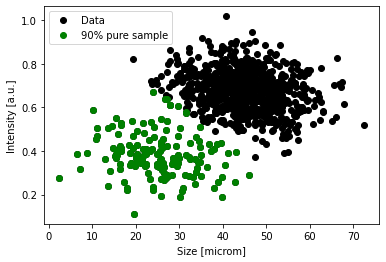

In [634]:
plt.plot(size, intensity, 'o', label='Data',c='k')
plt.plot(size90s_back, intens90s_back, 'o', label='90% pure sample',c='g')
plt.xlabel('Size [microm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.savefig('rotated_back.eps',bbox_inches='tight')